In [59]:
import pandas as pd
import os, sys
from datetime import *
import dateutil
from dateutil import parser, relativedelta
import matplotlib.pyplot as plt
%matplotlib inline

print("Current environment directory:" + sys.prefix)
print("System version: "+sys.version)

Current environment directory:/usr/local/Cellar/python/2.7.12/Frameworks/Python.framework/Versions/2.7
System version: 2.7.12 (default, Aug 23 2016, 08:54:23) 
[GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)]


In [2]:
fname = "inputData/priceData_pid8334.csv" # Only 100 nodes    
APNode_Prices = pd.read_csv( fname, header=0,index_col=0)#,nrows=10)
APNode_Prices.columns = pd.DatetimeIndex(APNode_Prices.columns,tz=dateutil.tz.tzutc())  # Note: This will be in UTC time. Use .tz_localize(pytz.timezone('America/Los_Angeles')) if a local time zone is desired- but note that this will 

chargePower = pd.read_csv('Data/efficiencyPower_pid8334temp.csv',header=0,index_col=0)
chargePower.columns = pd.DatetimeIndex(chargePower.columns,tz=dateutil.tz.tzutc())  # Note: This will be in UTC time. Use .tz_localize(pytz.timezone('America/Los_Angeles')) if a local time zone is desired- but note that this will 

APNode_Prices = APNode_Prices.loc[chargePower.index.values,:]  # Make sure that everything is the right shape
print(APNode_Prices.shape)
print(chargePower.shape)

In [21]:
revenue = APNode_prices * chargePower
dailyProfits = revenue.T.resample('D').sum().T
dailyProfits = dailyProfits.iloc[:,1:]  # Drop the first day, as this is associated with charging the battery
totalProfits = revenue.sum(axis=1)

In [49]:
dailyPortion = dailyProfits.div(totalProfits,axis=0)
dailyPortion.head()

,2012-01-02 00:00:00+00:00,2012-01-03 00:00:00+00:00,2012-01-04 00:00:00+00:00,2012-01-05 00:00:00+00:00,2012-01-06 00:00:00+00:00,2012-01-07 00:00:00+00:00,2012-01-08 00:00:00+00:00,2012-01-09 00:00:00+00:00,2012-01-10 00:00:00+00:00,2012-01-11 00:00:00+00:00,...,2016-12-23 00:00:00+00:00,2016-12-24 00:00:00+00:00,2016-12-25 00:00:00+00:00,2016-12-26 00:00:00+00:00,2016-12-27 00:00:00+00:00,2016-12-28 00:00:00+00:00,2016-12-29 00:00:00+00:00,2016-12-30 00:00:00+00:00,2016-12-31 00:00:00+00:00,2017-01-01 00:00:00+00:00
PENNGRVE_1_N001,0.000339,0.000406,0.000336,0.000261,0.000348,0.000293,0.000198,0.000402,0.000283,0.000243,...,0.000615,0.000345,0.000559,0.000531,0.000724,0.000758,0.000694,0.000602,0.000500,0.000996
ADCC_2_N001,0.000372,0.001046,-0.000232,0.000287,0.000380,0.000318,0.000213,0.000446,0.000304,0.000258,...,0.000666,0.000375,0.000605,0.000583,0.000794,0.000831,0.000765,0.000661,0.000550,0.001110
DECPTSG_2_N001,0.000362,0.000434,0.000361,0.000277,0.000370,0.000310,0.000208,0.000433,0.000302,0.000256,...,0.000654,0.000369,0.000608,0.000575,0.000790,0.000816,0.000747,0.000649,0.000545,0.001092
COLSTJT_1_B1,0.000336,0.000361,0.000251,0.000169,0.000310,0.000226,0.000126,0.000380,0.000244,0.000217,...,0.000609,0.000114,0.000462,0.000493,0.000667,0.000760,0.000653,0.000607,0.000448,0.001019
MONSRATE_6_N007,0.000307,0.000346,0.000300,0.000252,0.000326,0.000253,0.000175,0.000345,0.000247,0.000216,...,0.000522,0.000725,0.000788,0.000499,0.000653,0.000680,0.000732,0.000506,0.000350,0.000962


In [56]:
a = dailyPortion.values * -1
a.sort(axis=1)
dailySorted = pd.DataFrame(a,index=dailyPortion.index)
dailySorted.head()

,0,1,2,3,4,5,6,7,8,9,...,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826
PENNGRVE_1_N001,-0.000753,-0.000723,-0.000691,-0.000659,-0.000620,-0.000618,-0.000611,-0.000608,-0.000593,-0.000587,...,0.002577,0.002610,0.002613,0.002641,0.002703,0.002795,0.002863,0.002894,0.002964,0.003292
ADCC_2_N001,-0.000868,-0.000779,-0.000770,-0.000757,-0.000730,-0.000728,-0.000699,-0.000697,-0.000679,-0.000673,...,0.002102,0.002218,0.002252,0.002320,0.002362,0.002364,0.002381,0.002393,0.002412,0.002541
DECPTSG_2_N001,-0.001358,-0.001190,-0.001007,-0.000940,-0.000939,-0.000907,-0.000877,-0.000859,-0.000815,-0.000807,...,0.001132,0.001133,0.001138,0.001146,0.001147,0.001160,0.001164,0.001185,0.001189,0.001221
COLSTJT_1_B1,-0.001723,-0.001534,-0.001468,-0.001393,-0.001162,-0.001143,-0.001027,-0.001024,-0.000944,-0.000937,...,0.001075,0.001077,0.001079,0.001084,0.001085,0.001099,0.001128,0.001136,0.001187,0.001212
MONSRATE_6_N007,-0.001815,-0.001588,-0.001503,-0.001426,-0.001412,-0.001177,-0.001042,-0.001028,-0.001005,-0.000985,...,0.001055,0.001066,0.001070,0.001074,0.001081,0.001087,0.001113,0.001136,0.001167,0.001208


In [57]:
a = dailySorted.values
dailyCDF = pd.DataFrame(a.cumsum(axis=1),index=dailyPortion.index)

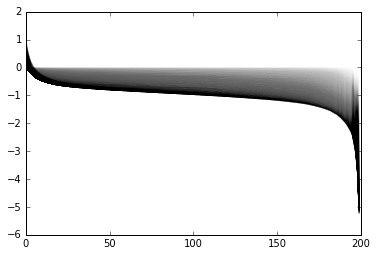

In [62]:
a = plt.plot(dailyCDF.values, 'k', alpha = 0.01)